In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/popular-video-games-1980-2023/games.csv')

In [3]:
df.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [4]:
#only using unique rows, there are many duplicated
print(len(df))
duplicated_rows = df.duplicated(subset='Title')
df = df.drop(df[duplicated_rows].index)
print(len(df))

1512
1099


In [5]:
df.isna().sum()

Unnamed: 0            0
Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

In [6]:
#creating fake release date for datapoints with 'releases on TBD' as release Date
df.loc[df['Release Date'] == 'releases on TBD', 'Release Date'] = 'Dec 31, 2024'

In [7]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['month'] = df['Release Date'].dt.month
df['year'] = df['Release Date'].dt.year
df['day'] = df['Release Date'].dt.day

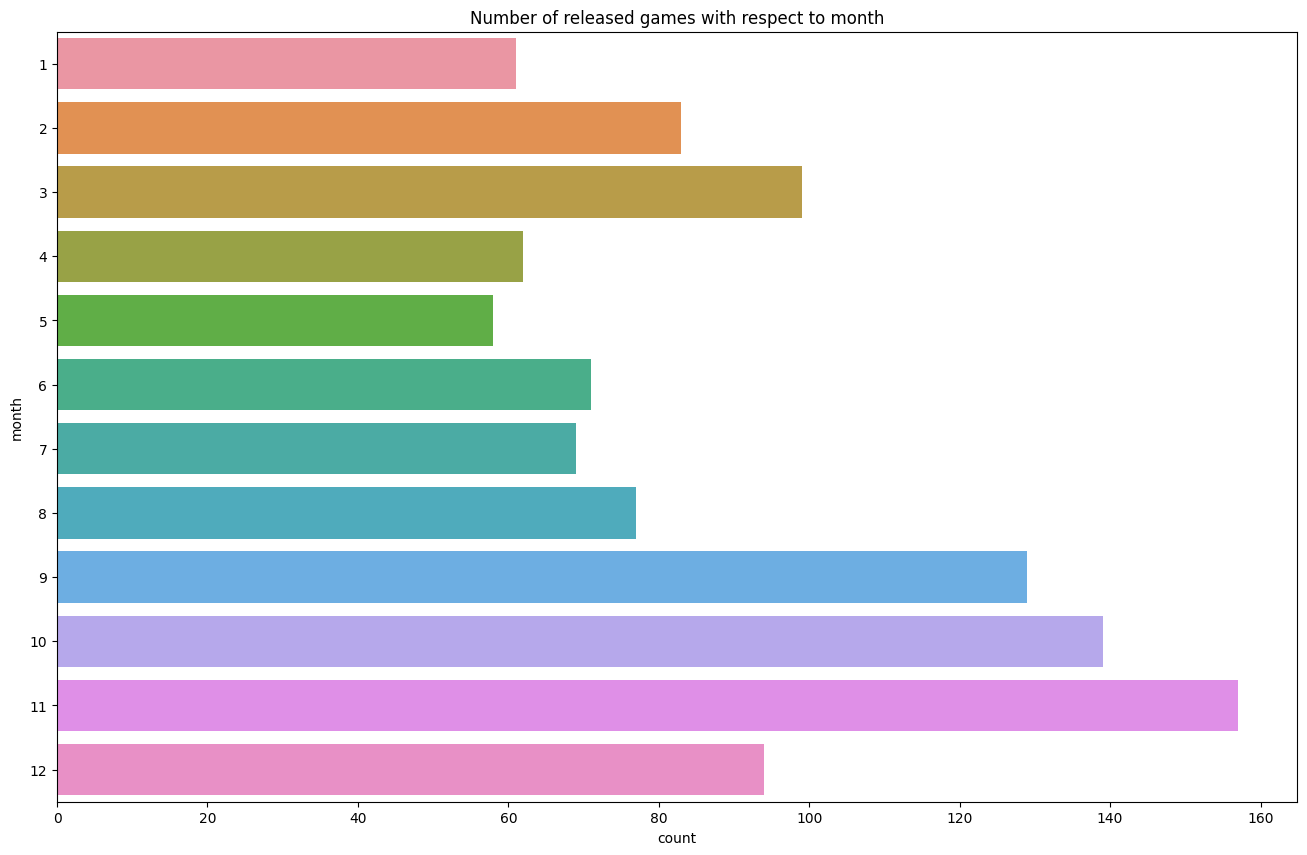

In [8]:
plt.figure(figsize=(16, 10))
plt.title('Number of released games with respect to month')
sns.countplot(data=df, y='month')
plt.show()

It looks like more games are coming out before the end of the year.

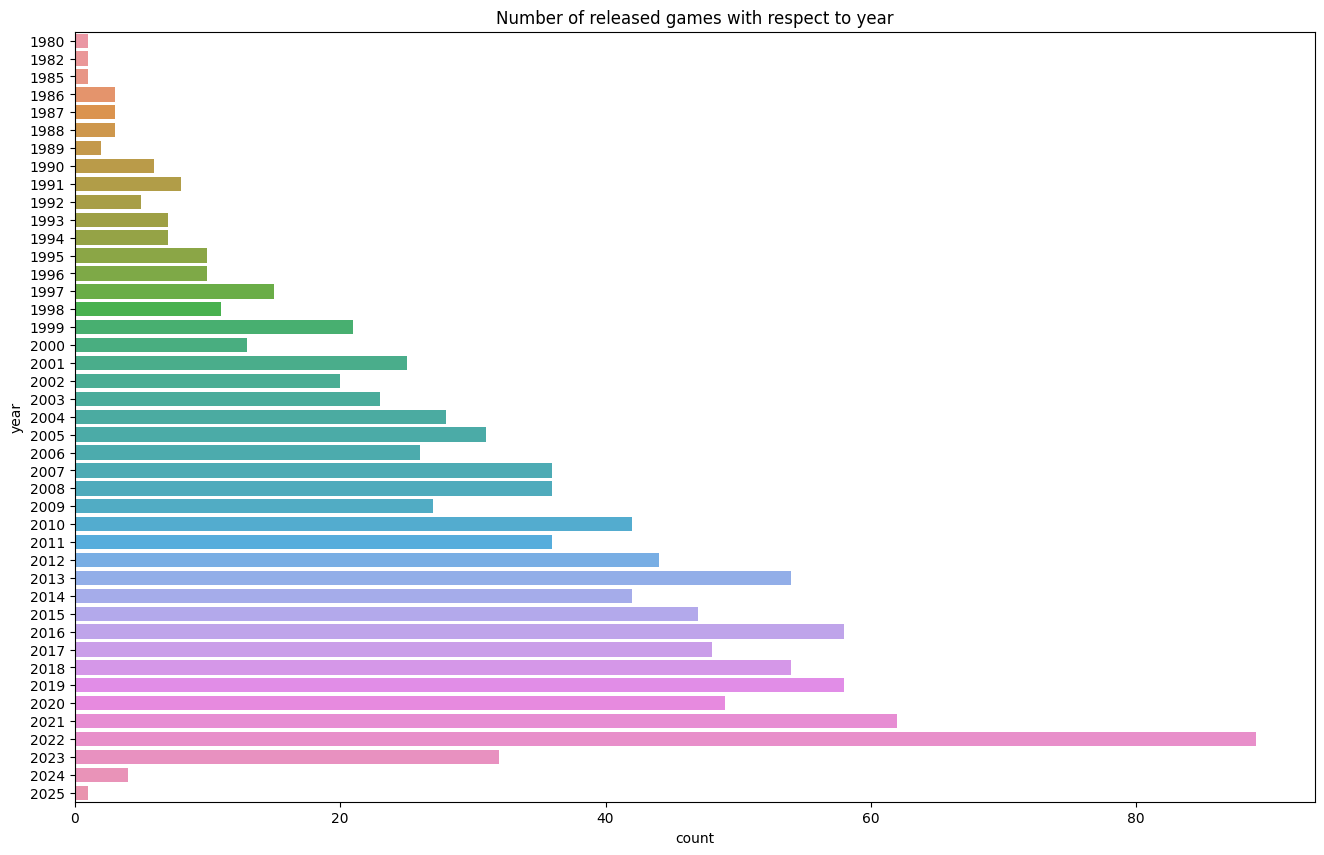

In [9]:
plt.figure(figsize=(16, 10))
plt.title('Number of released games with respect to year')
sns.countplot(data=df, y='year')
plt.show()

As expected, it's clear that the number of games released are incresing rapidly (ignore small spike at 2024, its from 'fake' dates)

In [10]:
df.head(2)

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,month,year,day
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K,2,2022,25
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K,12,2019,10


Replacing all data points containing 'K' with their numerical equivalents. For example changing 3.7K to 3700

In [11]:
columns_to_change = ['Times Listed', 'Number of Reviews', 'Plays',
                     'Playing', 'Backlogs', 'Wishlist']

In [12]:
for col in columns_to_change:
    tmp_col = list(map(lambda x: float(x.replace('K', '')) * 1000 if 'K' in x else float(x), df[col]))
    df[col] = tmp_col
df.head(2)

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,month,year,day
0,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900.0,3900.0,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000.0,3800.0,4600.0,4800.0,2,2022,25
1,1,Hades,2019-12-10,['Supergiant Games'],4.3,2900.0,2900.0,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3200.0,6300.0,3600.0,12,2019,10


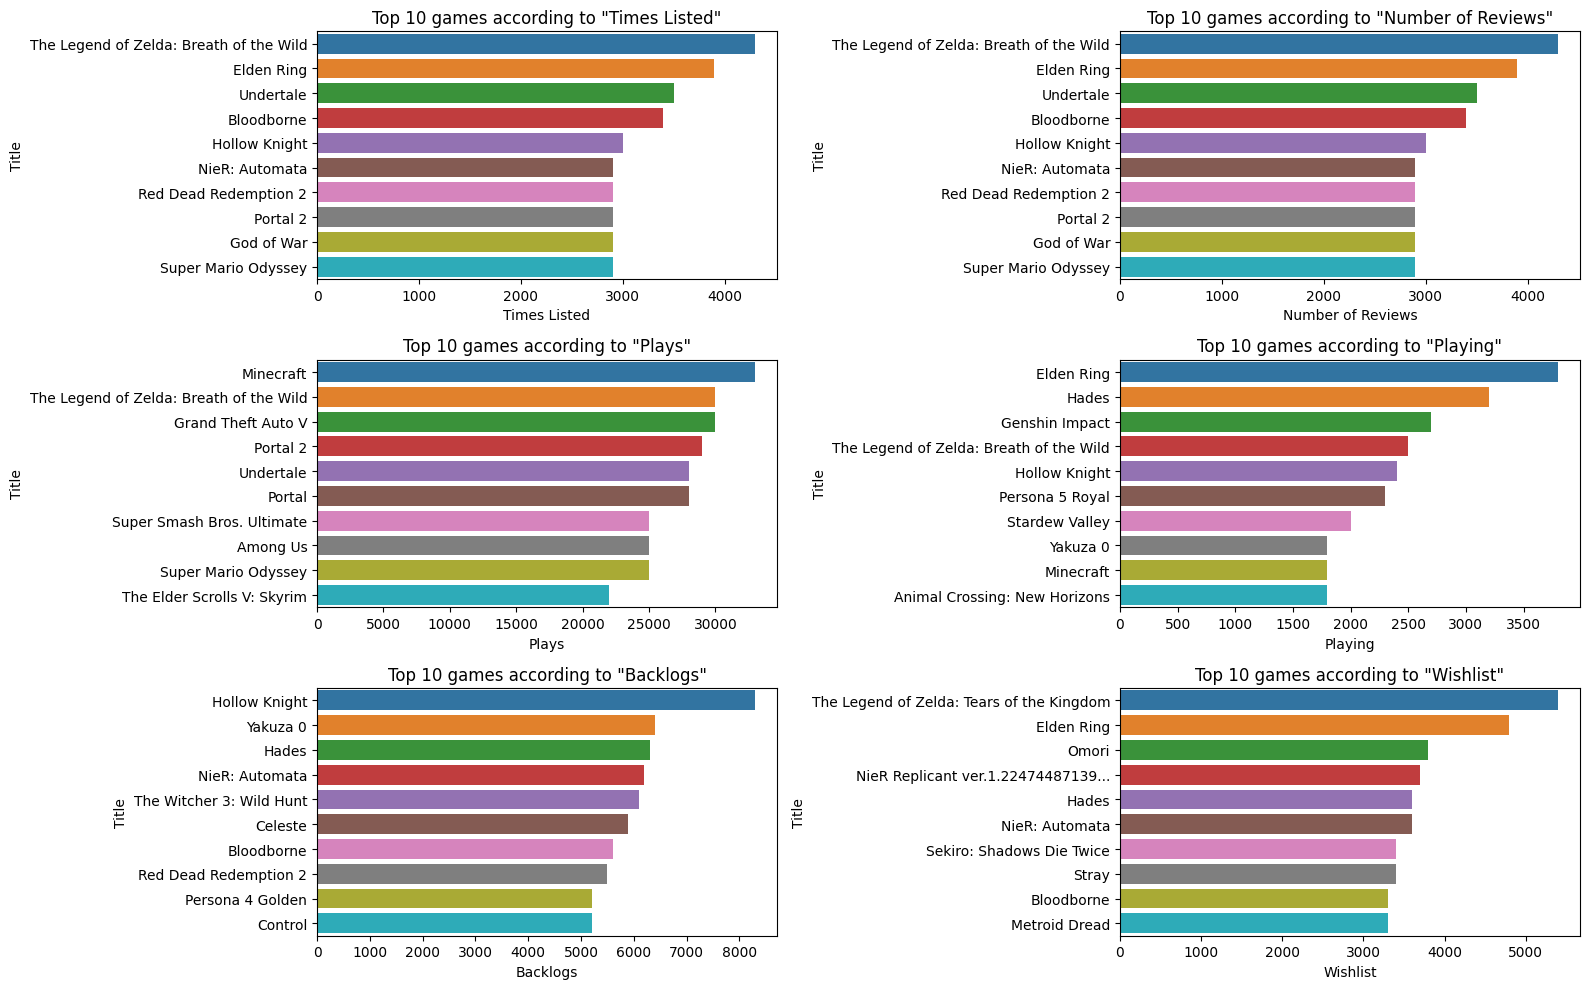

In [13]:
plt.figure(figsize=(16, 10))

tmp_cols = ['']
for count, col in enumerate(columns_to_change):
    plt.subplot(3,2, count +1 )
    #creating tmp df with 10 most "col" games
    indexes = df[col].sort_values(ascending=False)[:10].index
    tmp_df = df.loc[indexes][['Title', col]]
    
    sns.barplot(data=tmp_df, x=col, y='Title')
    plt.title(f'Top 10 games according to "{col}"')
plt.tight_layout()
plt.show()

Creating dict with count for each genre of games

In [14]:
genres_dict = {}
for index, row in df.iterrows():
    x = row['Genres'].replace('[', '').replace(']', '').replace("'", '').split(',')
    
    for genre in x:
        if genre not in genres_dict:
            genres_dict[genre] = 1
        else:
            genres_dict[genre] += 1

In [15]:
tmp_df = pd.DataFrame({'genre': genres_dict.keys(),
              'count': genres_dict.values()})

<AxesSubplot: xlabel='count', ylabel='genre'>

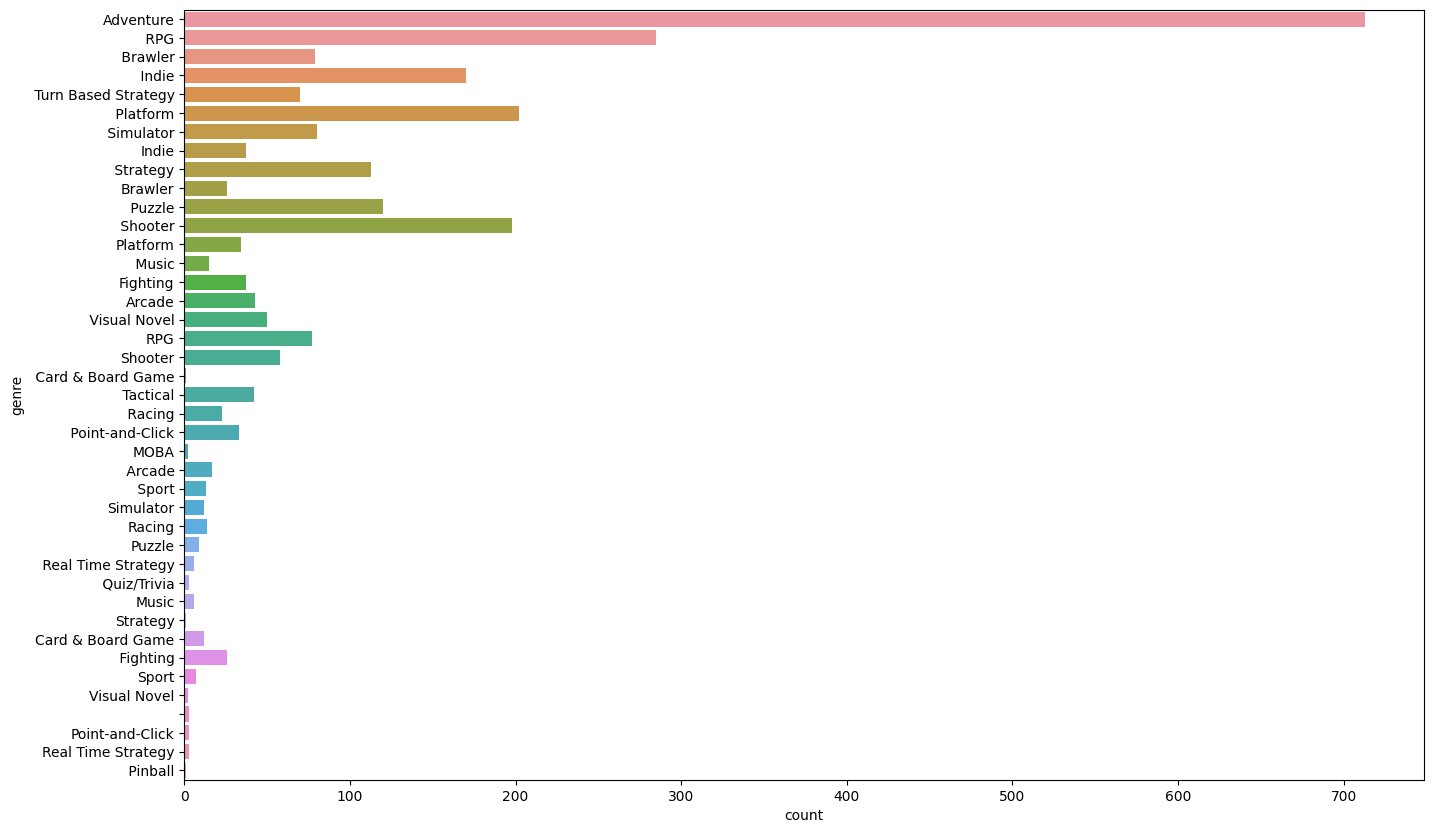

In [16]:
plt.figure(figsize=(16,10))
sns.barplot(data= tmp_df, y='genre', x='count')

Best games by rating

In [17]:
indexes = df['Rating'].sort_values(ascending=False).index[:20]
tmp_df = df.loc[indexes][['Title', 'Rating']]

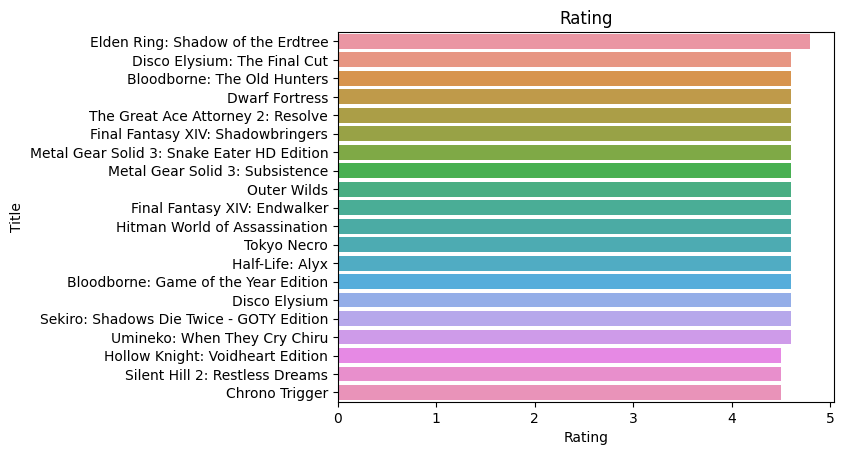

In [18]:
sns.barplot(data=tmp_df, y='Title', x='Rating')
plt.title('Rating')
plt.show()